<a href="https://colab.research.google.com/github/keiokosaka/Physical-AI-public/blob/main/physical_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# „Çª„É´1: ÂøÖË¶Å„Éë„ÉÉ„Ç±„Éº„Ç∏„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàÂàùÂõû„ÅÆ„ÅøÔºâ
!pip install stable-baselines3[extra] gym[classic_control] pyvirtualdisplay moviepy

# „Çª„É´2: ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import os
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from pyvirtualdisplay import Display

# „Çª„É´3: Áí∞Â¢ÉÊ∫ñÂÇô
env_id = "CartPole-v1"
env = gym.make(env_id)
env = Monitor(env)
env = DummyVecEnv([lambda: env])

# „Çª„É´4: „É¢„Éá„É´ÂÆöÁæ© & Â≠¶Áøí
model = PPO("MlpPolicy", env, verbose=1)
reward_log = []

# „Ç≥„Éº„É´„Éê„ÉÉ„ÇØ„ÅßÂ†±ÈÖ¨Ë®òÈå≤
class RewardCallback:
    def __init__(self):
        self.rewards = []

    def __call__(self, _locals, _globals):
        self.rewards.append(_locals['infos'][0]['episode']['r'] if 'episode' in _locals['infos'][0] else 0)
        return True

callback = RewardCallback()
model.learn(total_timesteps=50000)

# „Çª„É´5: Â†±ÈÖ¨„Ç∞„É©„ÉïÊèèÁîª
rewards = env.get_attr("episode_rewards")[0]
plt.plot(rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

# „Çª„É´6: ÂãïÁîª‰øùÂ≠ò„Éá„Ç£„É¨„ÇØ„Éà„É™‰ΩúÊàê
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)

# ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§ÔºàColab„ÅßÂãïÁîªÁîüÊàê„Å´ÂøÖË¶ÅÔºâ
display = Display(visible=0, size=(1400, 900))
display.start()

# „Çª„É´7: ÂãïÁîªÁî®„ÅÆÁîªÂÉè„Éï„É¨„Éº„É†ÂèéÈõÜ
env = gym.make(env_id, render_mode='rgb_array')
obs = env.reset(seed=42)
frames = []

for _ in range(500):
    frame = env.render()
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    if done or truncated:
        break

env.close()

# „Çª„É´8: ÂãïÁîª„Éï„Ç°„Ç§„É´‰ΩúÊàê
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# „Çª„É´9: Colab‰∏ä„ÅßÂãïÁîªË°®Á§∫
HTML(f"""
<video width=400 controls>
    <source src="{video_path}" type="video/mp4">
</video>
""")

# „Çª„É´10: „ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„É™„É≥„ÇØ„ÅÆ‰ΩúÊàê
from google.colab import files
files.download(video_path)


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.8/5.8 MB 23.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  √ó python setup.py egg_info did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

√ó Encountered error while generating package metadata.
‚ï∞‚îÄ> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'stable_baselines3'

In [2]:
# ‚úÖ ÂøÖË¶Å„Éë„ÉÉ„Ç±„Éº„Ç∏„Çí„Ç§„É≥„Çπ„Éà„Éº„É´Ôºà‰ΩôË®à„Å™[extra]„ÇíÈô§„ÅèÔºâ
!pip install -q stable-baselines3 pyvirtualdisplay moviepy gym[classic_control]

# ‚úÖ „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import os
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from pyvirtualdisplay import Display
from google.colab import files

# ‚úÖ ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§ÔºàÂãïÁîªÁîüÊàêÁî®Ôºâ
display = Display(visible=0, size=(1400, 900))
display.start()

# ‚úÖ Áí∞Â¢É„Å®„É¢„Éá„É´„ÅÆÂàùÊúüÂåñ
env_id = "CartPole-v1"
env = DummyVecEnv([lambda: Monitor(gym.make(env_id))])
model = PPO("MlpPolicy", env, verbose=1)

# ‚úÖ „É¢„Éá„É´„ÅÆÂ≠¶ÁøíÔºà5‰∏á„Çπ„ÉÜ„ÉÉ„ÉóÔºâ
model.learn(total_timesteps=50000)

# ‚úÖ Â†±ÈÖ¨„ÅÆÊé®Áßª„Çí„Ç∞„É©„ÉïË°®Á§∫
monitor_env = env.envs[0]
episode_rewards = monitor_env.episode_rewards
plt.figure(figsize=(10,5))
plt.plot(episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ‚úÖ ÂãïÁîª„ÅÆ‰øùÂ≠òÊ∫ñÂÇô
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)
env_vis = gym.make(env_id, render_mode="rgb_array")
obs = env_vis.reset(seed=42)
frames = []

# ‚úÖ Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„ÅßÁí∞Â¢É„ÇíÂãï„Åã„Åó„Éï„É¨„Éº„É†„ÇíÂèñÂæó
for _ in range(500):
    frame = env_vis.render()
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_vis.step(action)
    if done or truncated:
        break
env_vis.close()

# ‚úÖ ÂãïÁîª„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàê
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# ‚úÖ ÂãïÁîª„ÇíColab‰∏ä„ÅßË°®Á§∫
display_video = f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
"""
display(HTML(display_video))

# ‚úÖ „ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„É™„É≥„ÇØ„ÇíË°®Á§∫
files.download(video_path)


  error: subprocess-exited-with-error
  
  √ó python setup.py egg_info did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

√ó Encountered error while generating package metadata.
‚ï∞‚îÄ> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: No module named 'stable_baselines3'

In [3]:
# ‚úÖ ÂÆâÂÆö„Åó„Åü„Éë„ÉÉ„Ç±„Éº„Ç∏„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàpygameÊäú„ÅçÔºâ
!pip install -q stable-baselines3 pyvirtualdisplay moviepy gym[classic_control] --no-deps
!pip install -q torch torchvision torchaudio matplotlib numpy pandas tqdm cloudpickle imageio tensorboardX

# ‚úÖ ÂøÖË¶Å„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
from pyvirtualdisplay import Display
import os
from google.colab import files

# ‚úÖ ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§ÔºàColab„Åß„ÅÆÊèèÁîª„Çµ„Éù„Éº„ÉàÔºâ
display = Display(visible=0, size=(1400, 900))
display.start()

# ‚úÖ CartPoleÁí∞Â¢É„Å®„É¢„Éá„É´ÂàùÊúüÂåñ
env_id = "CartPole-v1"
env = DummyVecEnv([lambda: Monitor(gym.make(env_id))])
model = PPO("MlpPolicy", env, verbose=1)

# ‚úÖ „É¢„Éá„É´„ÅÆÂ≠¶ÁøíÔºàÊôÇÈñì„Åã„Åã„Çã„Åå5‰∏á„Çπ„ÉÜ„ÉÉ„Éó„ÅåÁõÆÂÆâÔºâ
model.learn(total_timesteps=50000)

# ‚úÖ Â†±ÈÖ¨Êé®Áßª„ÅÆÂèñÂæó„Éª„Ç∞„É©„ÉïÊèèÁîª
episode_rewards = env.envs[0].episode_rewards
plt.figure(figsize=(10,5))
plt.plot(episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ‚úÖ ÂãïÁîª‰ΩúÊàê„Éá„Ç£„É¨„ÇØ„Éà„É™
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)

# ‚úÖ ÂãïÁîªÁî®Áí∞Â¢ÉÔºà„É¨„É≥„ÉÄ„É™„É≥„Ç∞Ôºâ
env_vis = gym.make(env_id, render_mode="rgb_array")
obs, _ = env_vis.reset(seed=42)
frames = []

for _ in range(500):
    frames.append(env_vis.render())
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = env_vis.step(action)
    if done or truncated:
        break
env_vis.close()

# ‚úÖ ÂãïÁîª„Éï„Ç°„Ç§„É´„Å®„Åó„Å¶‰øùÂ≠ò
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# ‚úÖ ÂãïÁîª„ÇíColab‰∏ä„ÅßÂÜçÁîü
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# ‚úÖ „É≠„Éº„Ç´„É´PC„Å∏„ÅÆ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
files.download(video_path)



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184.5/184.5 kB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """
/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: DeprecationWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
  from scipy.ndimage.filters import sobel

  if event.key is 'enter':

  from pkg_resources import resource_stream, resource_exists

Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)

Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)

Implementing implicit namespace packages (as specified in 

AssertionError: Expected env to be a `gymnasium.Env` but got <class 'gym.wrappers.time_limit.TimeLimit'>

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 965.4/965.4 kB 8.8 MB/s eta 0:00:00
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.1     |
|    ep_rew_mean     | 21.1     |
| time/              |          |
|    fps             | 885      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.9        |
|    ep_rew_mean          | 26.9        |
| time/                   |             |
|    fps                  | 682         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008678438 |
|    clip_fraction   

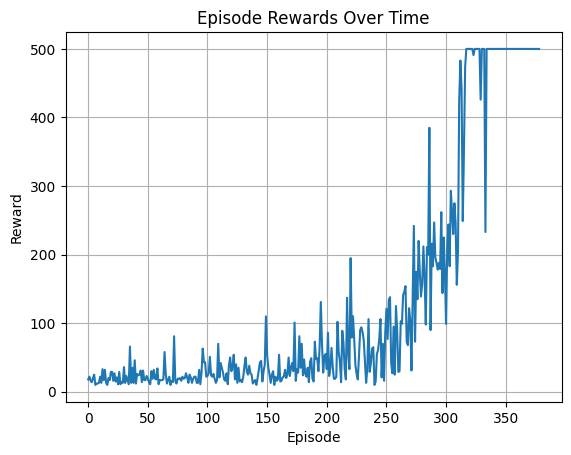

Moviepy - Building video ./cartpole_video/cartpole_result.mp4.
Moviepy - Writing video ./cartpole_video/cartpole_result.mp4



Moviepy - Done !
Moviepy - video ready ./cartpole_video/cartpole_result.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# ‚úÖ 1. ÂÆâÂÆöÂãï‰Ωú„Åô„Çã‰æùÂ≠ò„Éë„ÉÉ„Ç±„Éº„Ç∏„Çí„Ç§„É≥„Çπ„Éà„Éº„É´
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

# ‚úÖ 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from IPython.display import HTML
import os
from google.colab import files

# ‚úÖ 3. ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§ÔºàColab„ÅßÂøÖË¶ÅÔºâ
display = Display(visible=0, size=(1400, 900))
display.start()

# ‚úÖ 4. Áí∞Â¢É„Å®„É¢„Éá„É´„ÅÆÂàùÊúüÂåñÔºàgymnasium„Çí‰ΩøÁî®Ôºâ
env_id = "CartPole-v1"
def make_env():
    env = gym.make(env_id)
    env = Monitor(env)
    return env

vec_env = DummyVecEnv([make_env])
model = PPO("MlpPolicy", vec_env, verbose=1)

# ‚úÖ 5. Âº∑ÂåñÂ≠¶ÁøíÔºà5‰∏á„Çπ„ÉÜ„ÉÉ„ÉóÔºâ
model.learn(total_timesteps=50000)

# ‚úÖ 6. Â†±ÈÖ¨„ÅÆ„Éó„É≠„ÉÉ„Éà
episode_rewards = vec_env.envs[0].get_episode_rewards()
plt.plot(episode_rewards)
plt.title("Episode Rewards Over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# ‚úÖ 7. Â≠¶ÁøíÊ∏à„Åø„Ç®„Éº„Ç∏„Çß„É≥„Éà„ÅÆÂãï‰Ωú„ÇíÂãïÁîª„Å´Ë®òÈå≤
video_dir = "./cartpole_video"
os.makedirs(video_dir, exist_ok=True)

env_vis = gym.make(env_id, render_mode="rgb_array")
obs, _ = env_vis.reset(seed=42)
frames = []

for _ in range(500):
    frames.append(env_vis.render())
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env_vis.step(action)
    if done or truncated:
        obs, _ = env_vis.reset()
env_vis.close()

# ‚úÖ 8. „Éï„É¨„Éº„É†„Åã„ÇâÂãïÁîª‰ΩúÊàê
video_path = os.path.join(video_dir, "cartpole_result.mp4")
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path)

# ‚úÖ 9. Colab‰∏ä„ÅßÂãïÁîªÂÜçÁîü
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# ‚úÖ 10. „É≠„Éº„Ç´„É´„Å´„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
files.download(video_path)


In [5]:
import gym
from gym import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        self.num_joints = 5  # 5Èñ¢ÁØÄ
        self.dt = 0.1
        self.time = 0
        self.length = 1.0

        # Áä∂ÊÖãÁ©∫ÈñìÔºàÈñ¢ÁØÄËßíÂ∫¶„Å®„Åù„ÅÆÈÄüÂ∫¶Ôºâ
        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(-high, high)

        # Ë°åÂãïÁ©∫ÈñìÔºàÂêÑÈñ¢ÁØÄ„Å´‰∏é„Åà„ÇãËßíÈÄüÂ∫¶Ôºâ
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.reset()

    def reset(self):
        self.joint_angles = np.zeros(self.num_joints)
        self.joint_velocities = np.zeros(self.num_joints)
        self.position = 0.0  # x‰ΩçÁΩÆÔºàÈÄ≤Ë°åÊñπÂêëÔºâ
        self.time = 0.0
        return self._get_obs()

    def _get_obs(self):
        return np.concatenate([self.joint_angles, self.joint_velocities])

    def step(self, action):
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        # Áñë‰ººÁöÑ„Å™„ÄåÂâçÈÄ≤Èáè„ÄçÔºàÂçòÁ¥î„Å™Ê≥¢Êâì„Å°ÈÅãÂãï„É¢„Éá„É´Ôºâ
        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = forward_motion  # ÈÄ≤„ÇÄ„Åª„Å©Â†±ÈÖ¨
        done = self.time > 20  # 20Áßí„ÅßÁµÇ‰∫Ü

        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Time: {self.time:.2f} | Position: {self.position:.2f} | Angles: {self.joint_angles}")


In [6]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

# Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
env = SimpleSnakeEnv()
check_env(env)

# Â≠¶ÁøíÁî®Áí∞Â¢É„Å®„Ç®„Éº„Ç∏„Çß„É≥„Éà„ÅÆ‰ΩúÊàê
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100_000)

# „ÉÜ„Çπ„ÉàÂÆüË°å
obs = env.reset()
for _ in range(200):
    action, _ = model.predict(obs)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
        break


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [7]:
# 1. ÂøÖË¶Å„Å™„Éë„ÉÉ„Ç±„Éº„Ç∏„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàColabÁî®Ôºâ
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

# 2. „Ç§„É≥„Éù„Éº„Éà
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from google.colab import files
import os

# 3. ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§Ëµ∑ÂãïÔºàColabÁî®Ôºâ
display = Display(visible=0, size=(1400, 900))
display.start()

# 4. Áí∞Â¢ÉÂÆöÁæ©Ôºàgymnasium.EnvÁ∂ôÊâøÔºâ
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.viewer = None
        self.history_positions = []  # ÈÄ≤Ë°åË∑ùÈõ¢Â±•Ê≠¥‰øùÂ≠òÔºàÂ†±ÈÖ¨„Ç∞„É©„ÉïÁî®Ôºâ

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = forward_motion
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            # Á∞°Âçò„Å™2DÊèèÁîª„ÇínumpyÁîªÂÉè„ÅßËøî„Åô
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None

# 5. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
env = SimpleSnakeEnv()
check_env(env)

# 6. VecEnv & Monitor„Åß„É©„ÉÉ„Éó
vec_env = DummyVecEnv([lambda: Monitor(SimpleSnakeEnv())])

# 7. „É¢„Éá„É´‰ΩúÊàê„ÉªÂ≠¶Áøí
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)

# 8. Â†±ÈÖ¨„ÅÆÊé®Áßª„Ç∞„É©„ÉïÊèèÁîª
episode_rewards = vec_env.envs[0].history_positions
plt.plot(episode_rewards)
plt.xlabel("Step")
plt.ylabel("Cumulative Position (Reward proxy)")
plt.title("Forward Progress Over Time")
plt.grid(True)
plt.show()

# 9. ÂãïÁîªÁî®„Éï„É¨„Éº„É†ÂèéÈõÜ
env = SimpleSnakeEnv()
obs, _ = env.reset()
frames = []
for _ in range(200):
    frame = env.render(mode="rgb_array")
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

# 10. ÂãïÁîª‰ΩúÊàê„Éª‰øùÂ≠ò
video_path = "snake_robot.mp4"
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path, codec="libx264")

# 11. ÂãïÁîªË°®Á§∫
from IPython.display import HTML
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# 12. „É≠„Éº„Ç´„É´„Å´„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
files.download(video_path)


AssertionError: The reward returned by `step()` must be a float

In [8]:
# 1. ÂøÖË¶Å„Å™„Éë„ÉÉ„Ç±„Éº„Ç∏„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàColabÁî®Ôºâ
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

# 2. „Ç§„É≥„Éù„Éº„Éà
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from google.colab import files
import os

# 3. ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§Ëµ∑ÂãïÔºàColabÁî®Ôºâ
display = Display(visible=0, size=(1400, 900))
display.start()

# 4. Áí∞Â¢ÉÂÆöÁæ©Ôºàgymnasium.EnvÁ∂ôÊâøÔºâ
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.viewer = None
        self.history_positions = []  # ÈÄ≤Ë°åË∑ùÈõ¢Â±•Ê≠¥‰øùÂ≠òÔºàÂ†±ÈÖ¨„Ç∞„É©„ÉïÁî®Ôºâ

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = forward_motion
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            # Á∞°Âçò„Å™2DÊèèÁîª„ÇínumpyÁîªÂÉè„ÅßËøî„Åô
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None

# 5. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
env = SimpleSnakeEnv()
check_env(env)

# 6. VecEnv & Monitor„Åß„É©„ÉÉ„Éó
vec_env = DummyVecEnv([lambda: Monitor(SimpleSnakeEnv())])

# 7. „É¢„Éá„É´‰ΩúÊàê„ÉªÂ≠¶Áøí
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)

# 8. Â†±ÈÖ¨„ÅÆÊé®Áßª„Ç∞„É©„ÉïÊèèÁîª
episode_rewards = vec_env.envs[0].history_positions
plt.plot(episode_rewards)
plt.xlabel("Step")
plt.ylabel("Cumulative Position (Reward proxy)")
plt.title("Forward Progress Over Time")
plt.grid(True)
plt.show()

# 9. ÂãïÁîªÁî®„Éï„É¨„Éº„É†ÂèéÈõÜ
env = SimpleSnakeEnv()
obs, _ = env.reset()
frames = []
for _ in range(200):
    frame = env.render(mode="rgb_array")
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

# 10. ÂãïÁîª‰ΩúÊàê„Éª‰øùÂ≠ò
video_path = "snake_robot.mp4"
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path, codec="libx264")

# 11. ÂãïÁîªË°®Á§∫
from IPython.display import HTML
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# 12. „É≠„Éº„Ç´„É´„Å´„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
files.download(video_path)


AssertionError: The reward returned by `step()` must be a float

In [11]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.history_positions = []

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = float(forward_motion)  # ‚Üê „Åì„Åì„Å†„Åë‰øÆÊ≠£
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        pass


In [12]:
# Google Colab„Å™„ÇâÊúÄÂàù„Å´‰∏ÄÂõû„Å†„ÅëÂÆüË°å„Åó„Å¶„Åè„Å†„Åï„ÅÑ
!pip install -q stable-baselines3 gymnasium[classic_control] pyvirtualdisplay moviepy

import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from pyvirtualdisplay import Display
from moviepy.editor import ImageSequenceClip
from google.colab import files

# Colab„ÅßÂãïÁîª„Çí‰Ωú„Çã„Åü„ÇÅ„Å´‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§„ÇíËµ∑Âãï
display = Display(visible=0, size=(1400, 900))
display.start()

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 30}

    def __init__(self):
        super().__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.length = 1.0
        self.time = 0.0

        high = np.array([np.pi]*self.num_joints + [5.0]*self.num_joints, dtype=np.float32)
        self.observation_space = spaces.Box(low=-high, high=high, dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)

        self.joint_angles = None
        self.joint_velocities = None
        self.position = None
        self.history_positions = []

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints, dtype=np.float32)
        self.joint_velocities = np.zeros(self.num_joints, dtype=np.float32)
        self.position = 0.0
        self.time = 0.0
        self.history_positions = []
        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        return obs, {}

    def step(self, action):
        action = np.clip(action, self.action_space.low, self.action_space.high)
        self.joint_velocities = action
        self.joint_angles += self.joint_velocities * self.dt
        self.time += self.dt

        forward_motion = np.sin(self.joint_angles[0]) + np.sin(self.joint_angles[1])
        self.position += forward_motion * self.dt

        reward = float(forward_motion)
        self.history_positions.append(self.position)

        terminated = self.time > 20
        truncated = False

        obs = np.concatenate([self.joint_angles, self.joint_velocities])
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="human"):
        if mode == "rgb_array":
            import matplotlib.pyplot as plt
            from matplotlib.patches import Circle
            fig, ax = plt.subplots(figsize=(4, 2))
            ax.set_xlim(-1, 2)
            ax.set_ylim(-1, 1)
            ax.set_aspect("equal")
            ax.axis("off")

            base_x = 0
            base_y = 0
            angles = np.cumsum(self.joint_angles)
            x1 = base_x + self.length * np.cos(angles[0])
            y1 = base_y + self.length * np.sin(angles[0])
            x2 = x1 + self.length * np.cos(angles[1])
            y2 = y1 + self.length * np.sin(angles[1])

            ax.plot([base_x, x1], [base_y, y1], 'b-', linewidth=5)
            ax.plot([x1, x2], [y1, y2], 'r-', linewidth=5)

            ax.add_patch(Circle((base_x, base_y), 0.05, color="black"))
            ax.add_patch(Circle((x1, y1), 0.05, color="black"))
            ax.add_patch(Circle((x2, y2), 0.05, color="black"))

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            return image
        elif mode == "human":
            print(f"Time: {self.time:.2f}, Position: {self.position:.2f}, Joint angles: {self.joint_angles}")

    def close(self):
        pass

# Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
env = SimpleSnakeEnv()
check_env(env)

# „É©„ÉÉ„Éó„Åó„Å¶Â≠¶ÁøíÁí∞Â¢É‰ΩúÊàê
vec_env = DummyVecEnv([lambda: Monitor(SimpleSnakeEnv())])

# PPO„É¢„Éá„É´ÂàùÊúüÂåñÔºÜÂ≠¶Áøí
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)

# Â≠¶ÁøíÁµåÈÅé„ÅÆÂ†±ÈÖ¨ÔºàÈÄ≤Ë°åË∑ùÈõ¢Ôºâ„Çí„Ç∞„É©„ÉïÂåñ
plt.plot(vec_env.envs[0].history_positions)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Learning Progress")
plt.grid()
plt.show()

# ÂãïÁîª‰ΩúÊàêÁî®„Å´Êñ∞Áí∞Â¢É„ÅßÂãï„Åã„Åô
env = SimpleSnakeEnv()
obs, _ = env.reset()
frames = []
for _ in range(200):
    frame = env.render(mode="rgb_array")
    frames.append(frame)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

# ÂãïÁîªÊõ∏„ÅçÂá∫„Åó
video_path = "snake_robot.mp4"
clip = ImageSequenceClip(frames, fps=30)
clip.write_videofile(video_path, codec="libx264")

# ÂãïÁîªË°®Á§∫ÔºàColabÂØæÂøúÔºâ
from IPython.display import HTML
HTML(f"""
<video width=400 controls>
  <source src="{video_path}" type="video/mp4">
</video>
""")

# ÂãïÁîª„Éï„Ç°„Ç§„É´„Çí„É≠„Éº„Ç´„É´„Å´„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
files.download(video_path)


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -42.7    |
| time/              |          |
|    fps             | 1323     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 10.8         |
| time/                   |              |
|    fps                  | 887          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0063513904 |
|    clip_fraction        | 0.0439       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.82        |
|    explained_variance   | -0.0236      

AttributeError: 'Monitor' object has no attribute 'history_positions'

In [13]:
# 1. ÂøÖË¶Å„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
!pip install -q stable-baselines3[extra] gymnasium[box2d] pyvirtualdisplay opencv-python

# 2. ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§ÔºàÂãïÁîªÊíÆÂΩ±„ÅÆ„Åü„ÇÅÔºâ
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# 3. Ëá™‰ΩúÁí∞Â¢É„ÅÆÂÆöÁæ©ÔºàËõáÂûã„É≠„Éú„ÉÉ„ÉàÔºâ
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human"], "render_fps": 30}

    def __init__(self, render_mode=None):
        super(SimpleSnakeEnv, self).__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.max_steps = 200

        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_joints * 2 + 1,), dtype=np.float32)

        self.step_count = 0
        self.render_mode = render_mode

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints)
        self.joint_velocities = np.zeros(self.num_joints)
        self.position = 0.0
        self.step_count = 0
        self.prev_position = 0.0
        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        return obs, {}

    def step(self, action):
        self.joint_velocities = np.clip(action, -1.0, 1.0)
        self.joint_angles += self.joint_velocities * self.dt
        delta_pos = np.sum(np.sin(self.joint_angles)) * 0.1
        self.prev_position = self.position
        self.position += delta_pos
        self.step_count += 1

        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        reward = float(self.position)
        terminated = False
        truncated = self.step_count >= self.max_steps

        return obs, reward, terminated, truncated, {}

    def render(self):
        pass  # optional

    def close(self):
        pass
# 5. Ë©ï‰æ°Ôºà‰ΩçÁΩÆ„ÅÆÂ±•Ê≠¥„Ç∞„É©„ÉïÔºâ
import matplotlib.pyplot as plt

test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
positions = []
for _ in range(200):
    positions.append(test_env.position)
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    if terminated or truncated:
        break

plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Snake Movement")
plt.grid()
plt.show()
# 6. ÂãïÁîªÂá∫ÂäõÔºàVecVideoRecorder‰ΩøÁî®Ôºâ
import os

video_folder = "snake_videos/"
video_length = 200
os.makedirs(video_folder, exist_ok=True)

video_env = DummyVecEnv([lambda: SimpleSnakeEnv()])
video_env = VecVideoRecorder(video_env, video_folder,
                             record_video_trigger=lambda x: x == 0,
                             video_length=video_length,
                             name_prefix="snake_run")

obs = video_env.reset()
for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, _, _ = video_env.step(action)
video_env.close()
# 7. Google Colab„ÅßÂãïÁîª„ÇíË°®Á§∫„Éª„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„É™„É≥„ÇØÁîüÊàê
import glob
from IPython.display import HTML, display
from base64 import b64encode

latest_video = sorted(glob.glob(f"{video_folder}/*.mp4"))[-1]
mp4 = open(latest_video, 'rb').read()
b64 = b64encode(mp4).decode()
video_html = f'''
<video width=640 controls>
    <source src="data:video/mp4;base64,{b64}" type="video/mp4">
</video><br>
<a download href="data:video/mp4;base64,{b64}">Download Video</a>
'''
display(HTML(video_html))


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 374.4/374.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 37.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  √ó python setup.py bdist_wheel did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


ValueError: Error: Unexpected observation shape (5,) for Box environment, please use (4,) or (n_env, 4) for the observation shape.

In [14]:
# 1. ÂøÖË¶Å„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàBox2DÈô§Â§ñÔºÅÔºâ
!pip install -q stable-baselines3 pyvirtualdisplay opencv-python gymnasium

# 2. ‰ªÆÊÉ≥„Éá„Ç£„Çπ„Éó„É¨„Ç§ÔºàÂãïÁîªÊíÆÂΩ±„ÅÆ„Åü„ÇÅÔºâ
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
# 3. ËõáÂûã„É≠„Éú„ÉÉ„ÉàÁí∞Â¢É„ÅÆÂÆöÁæ©
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["human"], "render_fps": 30}

    def __init__(self, render_mode=None):
        super(SimpleSnakeEnv, self).__init__()
        self.num_joints = 2
        self.dt = 0.1
        self.max_steps = 200

        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(self.num_joints,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.num_joints * 2 + 1,), dtype=np.float32)

        self.render_mode = render_mode
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(self.num_joints)
        self.joint_velocities = np.zeros(self.num_joints)
        self.position = 0.0
        self.step_count = 0
        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        return obs, {}

    def step(self, action):
        self.joint_velocities = np.clip(action, -1.0, 1.0)
        self.joint_angles += self.joint_velocities * self.dt
        delta_pos = np.sum(np.sin(self.joint_angles)) * 0.1
        self.position += delta_pos
        self.step_count += 1

        obs = np.concatenate([self.joint_angles, self.joint_velocities, [self.position]])
        reward = float(self.position)
        terminated = False
        truncated = self.step_count >= self.max_steps

        return obs, reward, terminated, truncated, {}

    def render(self):
        pass

    def close(self):
        pass
# 4. „É¢„Éá„É´Â≠¶ÁøíÔºöPPO + Monitor + VecEnv
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env

check_env(SimpleSnakeEnv())

env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100_000)
# 5. „ÉÜ„Çπ„ÉàËµ∞Ë°å„Å®ÂâçÈÄ≤Ë∑ùÈõ¢„ÅÆÂèØË¶ñÂåñ
import matplotlib.pyplot as plt

test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
positions = []

for _ in range(200):
    positions.append(test_env.position)
    # reshape„Åó„Å¶„Ç®„É©„ÉºÂõûÈÅø
    obs_input = obs.reshape((1, -1))
    action, _ = model.predict(obs_input, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    if terminated or truncated:
        break

plt.plot(positions)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Snake Movement Over Time")
plt.grid()
plt.show()
# 6. ÂãïÁîªÁîüÊàêÔºàVecVideoRecorderÔºâ
import os

video_folder = "snake_videos/"
os.makedirs(video_folder, exist_ok=True)
video_length = 200

video_env = DummyVecEnv([lambda: SimpleSnakeEnv()])
video_env = VecVideoRecorder(video_env, video_folder,
                             record_video_trigger=lambda x: x == 0,
                             video_length=video_length,
                             name_prefix="snake_run")

obs = video_env.reset()
for _ in range(video_length):
    obs_input = obs.reshape((1, -1))
    action, _ = model.predict(obs_input)
    obs, _, _, _ = video_env.step(action)
video_env.close()
# 7. ÂãïÁîªÂÜçÁîü„Å®„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
import glob
from IPython.display import HTML, display
from base64 import b64encode

latest_video = sorted(glob.glob(f"{video_folder}/*.mp4"))[-1]
mp4 = open(latest_video, 'rb').read()
b64 = b64encode(mp4).decode()
video_html = f'''
<video width=640 controls>
    <source src="data:video/mp4;base64,{b64}" type="video/mp4">
</video><br>
<a download href="data:video/mp4;base64,{b64}">Download Video</a>
'''
display(HTML(video_html))


AssertionError: The observation returned by the `reset()` method does not match the data type (cannot cast) of the given observation space Box(-inf, inf, (5,), float32). Expected: float32, actual dtype: float64

In [15]:
!pip install gymnasium stable-baselines3 imageio imageio-ffmpeg


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 2.7      |
| time/              |          |
|    fps             | 655      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 1.22        |
| time/                   |             |
|    fps                  | 503         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004329184 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.84       |
|    explained_variance   | 0.0984      |
|    learning

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

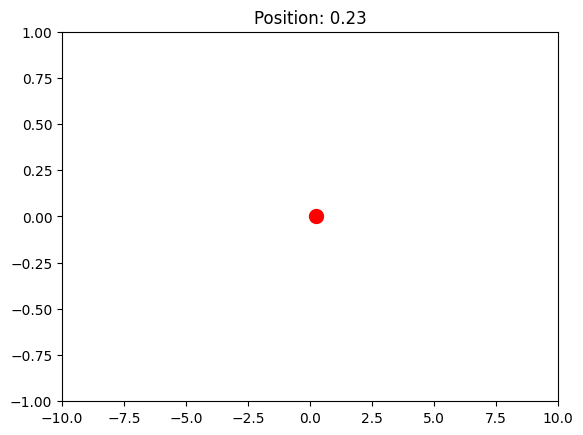

In [16]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import imageio

# 1. Ëá™‰ΩúÁí∞Â¢ÉÂÆöÁæ©
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 10}

    def __init__(self):
        super().__init__()
        self.num_joints = 2  # Èñ¢ÁØÄÊï∞ÔºàÂêÑÈñ¢ÁØÄ„Åå2Ëá™Áî±Â∫¶Ôºâ
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32
        )
        self.action_space = spaces.Box(
            low=-1.0, high=1.0, shape=(2,), dtype=np.float32
        )
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.joint_angles = np.zeros(2)
        self.position = 0.0
        self.time = 0
        self.max_time = 200
        self.history = []
        obs = np.array([*self.joint_angles, self.position, np.sin(self.time), np.cos(self.time)], dtype=np.float32)
        return obs, {}

    def step(self, action):
        self.joint_angles += action
        movement = np.sin(self.joint_angles[0]) * np.cos(self.joint_angles[1])
        self.position += movement
        self.time += 1
        obs = np.array([*self.joint_angles, self.position, np.sin(self.time), np.cos(self.time)], dtype=np.float32)
        reward = float(movement)
        terminated = False
        truncated = self.time >= self.max_time
        self.history.append(self.position)
        return obs, reward, terminated, truncated, {}

    def render(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return image

# 2. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
check_env(SimpleSnakeEnv())

# 3. Monitor + VecEnv „É©„ÉÉ„Éó
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])

# 4. PPO „É¢„Éá„É´‰ΩúÊàêÔºÜÂ≠¶Áøí
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„ÅßÂãï‰Ωú„ÉÜ„Çπ„Éà & ÂãïÁîª‰øùÂ≠ò
test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
images = []
for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# 6. ÂãïÁîª‰øùÂ≠ò
imageio.mimsave("snake_simulation.gif", images, fps=10)
print("üé• ÂãïÁîª 'snake_simulation.gif' „Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü")

# 7. ÊàêÈï∑„Ç∞„É©„Éï„ÅÆÊèèÁîª
plt.plot(test_env.history)
plt.xlabel("Step")
plt.ylabel("Forward Position")
plt.title("Learning Progress")
plt.grid(True)
plt.savefig("learning_curve.png")
plt.show()


In [17]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´
!pip install stable-baselines3[extra] imageio

# „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import imageio

# Áí∞Â¢ÉÂÆöÁæ©
class SimpleSnakeEnv(gym.Env):
    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        # Ë¶≥Ê∏¨Á©∫ÈñìÔºà2Èñ¢ÁØÄ„ÅÆËßíÂ∫¶„ÉªËßíÈÄüÂ∫¶„Éª‰ΩçÁΩÆÔºâ: 5Ê¨°ÂÖÉ
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        # Ë°åÂãïÁ©∫ÈñìÔºà2„Å§„ÅÆÈñ¢ÁØÄ„Éà„É´„ÇØÔºâ
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)

        self.dt = 0.1  # ÊôÇÈñìÂàª„Åø
        self.reset()

    def reset(self):
        self.theta1 = 0.0
        self.theta2 = 0.0
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.position = 0.0  # xËª∏ÊñπÂêë„ÅÆ‰ΩçÁΩÆ
        self.time = 0.0
        return np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)

    def step(self, action):
        torque1 = float(np.clip(action[0], -1, 1))
        torque2 = float(np.clip(action[1], -1, 1))

        # „Ç∑„É≥„Éó„É´„Å™ÈÅãÂãï„É¢„Éá„É´Ôºà„Ç™„Ç§„É©„ÉºÁ©çÂàÜÔºâ
        self.omega1 += torque1 * self.dt
        self.omega2 += torque2 * self.dt
        self.theta1 += self.omega1 * self.dt
        self.theta2 += self.omega2 * self.dt

        # ‰ªÆ„ÅÆÂâçÈÄ≤ÈÅãÂãïÔºö2Èñ¢ÁØÄ„ÅÆ„Ç∑„É≥„ÇØ„É≠Áéá„ÅßÂâçÈÄ≤ÈáèÊ±∫ÂÆö
        forward_velocity = np.cos(self.theta1 - self.theta2) * 0.05
        self.position += forward_velocity

        self.time += self.dt

        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        reward = float(forward_velocity)  # ÂâçÈÄ≤Èáè„ÇíÂ†±ÈÖ¨„Å´
        terminated = self.time > 20.0
        truncated = False
        info = {}

        return obs, reward, terminated, truncated, info

    def render(self, mode="rgb_array"):
        fig, ax = plt.subplots()
        canvas = FigureCanvas(fig)
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        canvas.draw()
        buf = canvas.buffer_rgba()
        image = np.asarray(buf)
        plt.close(fig)
        return image

# Áí∞Â¢É„ÉÜ„Çπ„Éà
check_env(SimpleSnakeEnv())

# „É¢„Éã„Çø„Éº‰ªò„ÅçÁí∞Â¢É„Çí‰ΩúÊàê
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])

# „É¢„Éá„É´ÂÆöÁæ©„Å®Â≠¶Áøí
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# Â≠¶ÁøíÂæå„ÅÆÂãï‰Ωú„ÇíÂèØË¶ñÂåñ
test_env = SimpleSnakeEnv()
obs = test_env.reset()
images = []
for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# GIF„Å®„Åó„Å¶‰øùÂ≠ò
imageio.mimsave("snake_rl.gif", images, fps=10)

# Google Colab „ÅßË°®Á§∫
from IPython.display import Image
Image(filename="snake_rl.gif")


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 0.0113   |
| time/              |          |
|    fps             | 1360     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | 1.49        |
| time/                   |             |
|    fps                  | 753         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004806616 |
|    clip_fraction        | 0.0404      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | 0.39        |
|    learning

  warnings.warn(



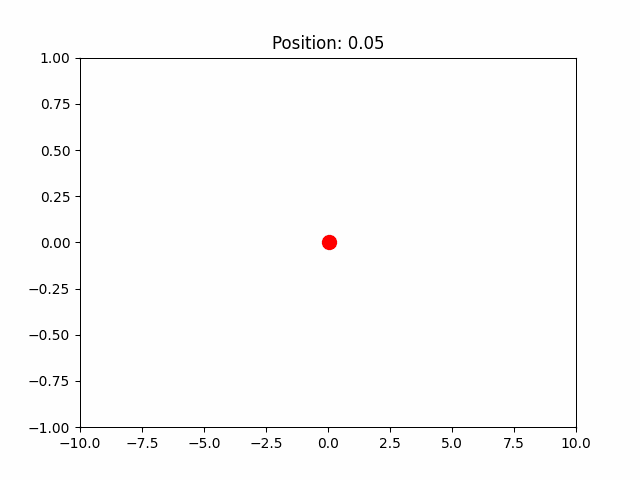

In [18]:
# ÊúÄÊñ∞Áí∞Â¢É„ÅßÂãï„Åã„Åô„Åü„ÇÅ„Å´ gymnasium „Çí„Ç§„É≥„Çπ„Éà„Éº„É´
!pip install gymnasium stable-baselines3[extra] imageio

# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Éù„Éº„Éà
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import imageio

# Ëá™‰Ωú„ÅÆËõáÂûã„É≠„Éú„ÉÉ„ÉàÁí∞Â¢É
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 10}

    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.dt = 0.1
        self.time = 0.0
        self.render_mode = "rgb_array"

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.theta1 = 0.0
        self.theta2 = 0.0
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.position = 0.0
        self.time = 0.0
        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        return obs, {}

    def step(self, action):
        torque1 = float(np.clip(action[0], -1, 1))
        torque2 = float(np.clip(action[1], -1, 1))

        self.omega1 += torque1 * self.dt
        self.omega2 += torque2 * self.dt
        self.theta1 += self.omega1 * self.dt
        self.theta2 += self.omega2 * self.dt

        forward_velocity = np.cos(self.theta1 - self.theta2) * 0.05
        self.position += forward_velocity
        self.time += self.dt

        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        reward = float(forward_velocity)
        terminated = self.time > 20.0
        truncated = False
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self):
        fig, ax = plt.subplots()
        canvas = FigureCanvas(fig)
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        canvas.draw()
        buf = canvas.buffer_rgba()
        image = np.asarray(buf)
        plt.close(fig)
        return image

# ‚úÖ Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
check_env(SimpleSnakeEnv())

# ‚úÖ „É¢„Éã„Çø„Éº‰ªò„Åç„Éô„ÇØ„Éà„É´Áí∞Â¢É„ÅßÂ≠¶Áøí
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=10000)

# ‚úÖ Âãï‰ΩúÂèØË¶ñÂåñÁî®„ÅÆ„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥
test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
images = []
for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# ‚úÖ GIF‰øùÂ≠ò
imageio.mimsave("snake_rl.gif", images, fps=10)

# ‚úÖ Google Colab„ÅßË°®Á§∫
from IPython.display import Image
Image(filename="snake_rl.gif")


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | 1.43     |
| time/              |          |
|    fps             | 1319     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | 1.89         |
| time/                   |              |
|    fps                  | 753          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0048703738 |
|    clip_fraction        | 0.0511       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.83        |
|    explained_variance   | 0.153        

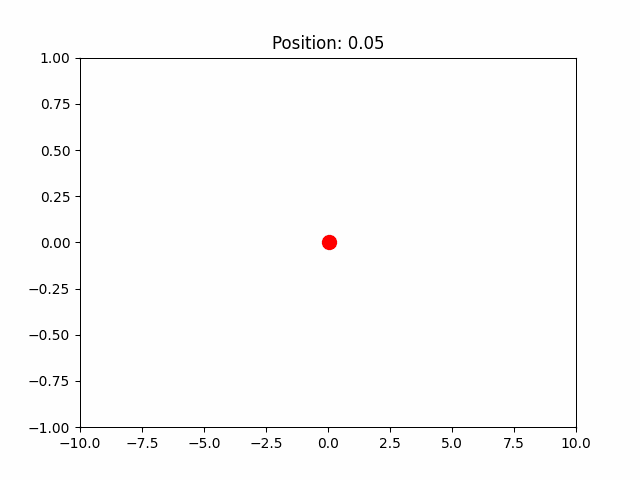

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: wrapper Monitor has no attribute 'file_handler'

In [19]:
# „Éë„ÉÉ„Ç±„Éº„Ç∏„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàÂàùÂõû„ÅÆ„ÅøÔºâ
!pip install gymnasium stable-baselines3[extra] imageio

# „É©„Ç§„Éñ„É©„É™„ÅÆË™≠„ÅøËæº„Åø
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_checker import check_env
import imageio
from IPython.display import Image, display
from google.colab import files
import os

# Áí∞Â¢ÉÂÆöÁæ©
class SimpleSnakeEnv(gym.Env):
    metadata = {"render_modes": ["rgb_array"], "render_fps": 10}

    def __init__(self):
        super(SimpleSnakeEnv, self).__init__()
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(5,), dtype=np.float32)
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.dt = 0.1
        self.time = 0.0
        self.render_mode = "rgb_array"

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.theta1 = 0.0
        self.theta2 = 0.0
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.position = 0.0
        self.time = 0.0
        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        return obs, {}

    def step(self, action):
        torque1 = float(np.clip(action[0], -1, 1))
        torque2 = float(np.clip(action[1], -1, 1))

        self.omega1 += torque1 * self.dt
        self.omega2 += torque2 * self.dt
        self.theta1 += self.omega1 * self.dt
        self.theta2 += self.omega2 * self.dt

        forward_velocity = np.cos(self.theta1 - self.theta2) * 0.05
        self.position += forward_velocity
        self.time += self.dt

        obs = np.array([self.theta1, self.theta2, self.omega1, self.omega2, self.position], dtype=np.float32)
        reward = float(forward_velocity)
        terminated = self.time > 20.0
        truncated = False
        info = {}
        return obs, reward, terminated, truncated, info

    def render(self):
        fig, ax = plt.subplots()
        canvas = FigureCanvas(fig)
        ax.set_xlim(-10, 10)
        ax.set_ylim(-1, 1)
        ax.plot(self.position, 0, 'ro', markersize=10)
        ax.set_title(f"Position: {self.position:.2f}")
        canvas.draw()
        buf = canvas.buffer_rgba()
        image = np.asarray(buf)
        plt.close(fig)
        return image

# ‚úÖ Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
check_env(SimpleSnakeEnv())

# ‚úÖ „É¢„Éã„Çø„Éº‰ªò„ÅçÁí∞Â¢É„Å®„Éô„ÇØ„Éà„É´Âåñ
env_fn = lambda: Monitor(SimpleSnakeEnv())
vec_env = DummyVecEnv([env_fn])

# ‚úÖ Â≠¶Áøí
model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=20000)

# ‚úÖ „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥GIF‰ΩúÊàê
test_env = SimpleSnakeEnv()
obs, _ = test_env.reset()
images = []

for _ in range(200):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, terminated, truncated, _ = test_env.step(action)
    img = test_env.render()
    images.append(img)
    if terminated or truncated:
        break

# ‚úÖ GIF‰øùÂ≠ò„Å®Ë°®Á§∫„Éª„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
gif_filename = "snake_rl.gif"
imageio.mimsave(gif_filename, images, fps=10)

# Ë°®Á§∫
display(Image(filename=gif_filename))

# „ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„É™„É≥„ÇØ
files.download(gif_filename)

# ‚úÖ Â≠¶ÁøíÊõ≤Á∑ö„ÇíÂèØË¶ñÂåñÔºàÂ†±ÈÖ¨„ÅÆÊé®ÁßªÔºâ
import pandas as pd

# MonitorÁí∞Â¢É„ÅåËá™ÂãïÁîüÊàê„Åô„Çã log „Éï„Ç°„Ç§„É´„ÇíË™≠„ÅøËæº„ÇÄ
log_dir = vec_env.envs[0].get_wrapper_attr('file_handler').base_filename.rsplit('/', 1)[0]
monitor_file = [f for f in os.listdir(log_dir) if f.startswith('monitor') and f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(log_dir, monitor_file), skiprows=1)

# „Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(10, 4))
plt.plot(df["r"], label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Learning Progress (Reward per Episode)")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# „Ç™„É†„Éã„Éõ„Ç§„Éº„É´„ÅÆË°åÂàó„ÇíÊ±Ç„ÇÅ„Çã
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
!pip install stable-baselines3[extra] pybullet moviepy

import gym
import numpy as np
import pybullet as p
import pybullet_data
import time
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip

# ---- Áí∞Â¢ÉÂÆöÁæ© ---- #
class OmniWheelEnv(gym.Env):
    def __init__(self):
        super(OmniWheelEnv, self).__init__()
        self.dt = 0.1
        self.max_steps = 200
        self.step_count = 0

        # Âãï‰ΩúÁ©∫ÈñìÔºà3Ëº™„Åù„Çå„Åû„Çå„ÅÆÂõûËª¢ÈÄüÂ∫¶Ôºâ
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        # Áä∂ÊÖãÔºà‰ΩçÁΩÆ„Å®ËßíÂ∫¶Ôºâ
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)

        # „É≠„Éú„ÉÉ„ÉàÂàùÊúüÁä∂ÊÖã
        self.reset()

    def reset(self):
        self.x = 0.0
        self.y = 0.0
        self.theta = 0.0  # Âêë„Åç
        self.step_count = 0
        return np.array([self.x, self.y, self.theta], dtype=np.float32)

    def step(self, action):
        self.step_count += 1
        r = 0.05  # ËªäËº™ÂçäÂæÑ
        l = 0.15  # „É≠„Éú„ÉÉ„Éà‰∏≠ÂøÉ„Åã„ÇâËªäËº™„Åæ„Åß„ÅÆË∑ùÈõ¢

        # „Ç™„É†„Éã„Éõ„Ç§„Éº„É´„ÅÆÈÅãÂãïÂ≠¶Ë°åÂàóÔºà„É≠„Éú„ÉÉ„Éà‚ÜíËªäËº™ÈÄüÂ∫¶Ôºâ
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])

        # „É≠„Éú„ÉÉ„ÉàÈÄüÂ∫¶ÔºàxÃá, yÃá, Œ∏ÃáÔºâ
        v = np.linalg.pinv(J) @ (action * r)

        self.x += v[0] * self.dt
        self.y += v[1] * self.dt
        self.theta += v[2] * self.dt

        obs = np.array([self.x, self.y, self.theta], dtype=np.float32)

        # ÂÜÜÂºß‰∏≠ÂøÉ(1,0)„ÅßÂçäÂæÑ1„ÅÆËªåÈÅì„ÇíÁêÜÊÉ≥„Å®„Åô„Çã
        radius = np.sqrt((self.x - 1.0)**2 + (self.y)**2)
        reward = - (radius - 1.0)**2  # ÊúÄÂ∞è‰∫å‰πóË™§Â∑Æ

        done = self.step_count >= self.max_steps
        return obs, reward, done, {}

    def render(self, mode='rgb_array'):
        # „Ç∑„É≥„Éó„É´„Å™ÊèèÁîª„ÅØÁúÅÁï•ÔºàÂãïÁîªÂá∫ÂäõÁî®„Å´Âà•ÈÄî‰ΩúÊàêÔºâ
        return np.array([])

# ---- Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ ---- #
env = OmniWheelEnv()
check_env(env)

# ---- Â≠¶Áøí ---- #
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

# ---- „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Å®ÂãïÁîª ---- #
frames = []
obs = env.reset()
for _ in range(200):
    action, _ = model.predict(obs)
    obs, _, done, _ = env.step(action)

    # ÂèØË¶ñÂåñÁî®ÁîªÂÉè„Çí‰ΩúÊàê
    frame = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    rx, ry = int(cx + obs[0]*100), int(cy - obs[1]*100)
    frame = cv2.circle(frame, (rx, ry), 5, (255, 0, 0), -1)
    frame = cv2.circle(frame, (300, 200), 100, (0, 255, 0), 1)  # ÁêÜÊÉ≥ËªåÈÅì
    frames.append(frame)

# ---- ÂãïÁîª‰ΩúÊàê„Å®‰øùÂ≠ò ---- #
clip = ImageSequenceClip(frames, fps=int(1/env.dt))
video_path = "/content/omniwheel_arc_simulation.mp4"
clip.write_videofile(video_path)

# ---- „ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„É™„É≥„ÇØ ---- #
from google.colab import files
files.download(video_path)


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 103.2/103.2 MB 6.8 MB/s eta 0:00:00


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [21]:
# ========================
# ‚ë† „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
# ========================
!pip install stable-baselines3[extra] pybullet moviepy opencv-python

# ========================
# ‚ë° „É©„Ç§„Éñ„É©„É™„ÅÆË™≠„ÅøËæº„Åø
# ========================
import pybullet as p
import pybullet_data
import gym
import numpy as np
import os
import time
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files

# ========================
# ‚ë¢ Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ©
# ========================
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super(OmniWheelEnv, self).__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(3,), dtype=np.float32)

        # PyBullet setup
        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")

        self.robot_radius = 0.2
        self.robot_id = None

    def reset(self):
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        # Ëº™„ÇíË°®ÁèæÔºàÂèØË¶ñÂåñÁî®„ÄÅÂÆüÈöõ„ÅÆÂõûËª¢„Å™„ÅóÔºâ
        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        return self._get_obs()

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        # „É¢„Éº„Çø„ÉºÈÄüÂ∫¶ ‚Üí „É≠„Éú„ÉÉ„ÉàÈÄüÂ∫¶„Å∏„ÅÆÊèõÁÆóÔºàÈÄÜÈÅãÂãïÂ≠¶Ë°åÂàó„ÅÆÁ∞°ÊòìËøë‰ººÔºâ
        r = 0.05
        l = 0.15
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])
        v = np.linalg.pinv(J) @ (action * r)
        vx, vy, omega = v

        # ÁèæÂú®ËßíÂ∫¶„Å´Âøú„Åò„Åü„Éú„Éá„Ç£Â∫ßÊ®ôÁ≥ª„Åß„ÅÆÈÄüÂ∫¶Â§âÊèõ
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        # apply velocity by repositioning (Á∞°ÊòìÁöÑ)
        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()
        # ÁêÜÊÉ≥ËªåÈÅìÔºö‰∏≠ÂøÉ(1,0), ÂçäÂæÑ1
        radius = np.sqrt((obs[0] - 1.0)**2 + (obs[1])**2)
        reward = - (radius - 1.0)**2

        done = self.step_counter >= self.max_steps
        return obs, reward, done, {}

    def close(self):
        p.disconnect()

# ========================
# ‚ë£ Áí∞Â¢É„ÉÜ„Çπ„Éà„Å®Â≠¶Áøí
# ========================
env = OmniWheelEnv(render_mode=False)
check_env(env)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# ========================
# ‚ë§ „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Å®ÂèØË¶ñÂåñ
# ========================
sim_env = OmniWheelEnv(render_mode=False)
obs = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # ÁêÜÊÉ≥ÂÜÜ
    frames.append(img)

sim_env.close()

# ========================
# ‚ë• ÂãïÁîª‰øùÂ≠ò„Å®„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
# ========================
clip = ImageSequenceClip(frames, fps=int(1 / sim_env.time_step))
video_path = "/content/omni_pybullet_arc.mp4"
clip.write_videofile(video_path)
files.download(video_path)


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [22]:
# Gymnasium „Çí„Ç§„É≥„Çπ„Éà„Éº„É´ÔºàColabÁí∞Â¢É„Åå„Åæ„Å†Gym„ÅÆÂ†¥ÂêàÔºâ
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python --quiet

# „É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„Åø
import gymnasium as gym  # gym ‚Üí gymnasium „Å´Â§âÊõ¥
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# Áí∞Â¢É„ÇØ„É©„Çπ„ÅÆÂÆöÁæ©Ôºà‰∏ÄÈÉ®Â§âÊõ¥„ÅÇ„ÇäÔºâ
class OmniWheelEnv(gym.Env):  # gym.Env ‚Üí gymnasium.Env „Å®Âêå„ÅòÊâ±„ÅÑ„ÅßOK
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(3,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)  # gymnasium „ÅÆ‰ªïÊßò„Å´Âêà„Çè„Åõ„Çã
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info  # gymnasium „ÅØ (obs, info) „ÇíËøî„Åô

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])
        v = np.linalg.pinv(J) @ (action * r)
        vx, vy, omega = v

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = - (radius - 1.0) ** 2

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}
        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ
env = OmniWheelEnv(render_mode=False)
check_env(env)

# „É¢„Éá„É´‰ΩúÊàê„Å®Â≠¶Áøí
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åã„ÇâË°åÂàóÊé®ÂÆöÔºà‰æã: Ë°åÂàó J „ÅÆÊì¨‰ººÈÄÜË°åÂàó„ÇíËøë‰ººÔºâ
# action -> v = pinv(J) * (action * r)
# „Åì„Åì„Åß„ÅØJ„ÅØÊó¢Áü•„ÅÆ„ÇÇ„ÅÆ„Å™„ÅÆ„Åß„ÄÅÂ≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„ÅÆ policy „Çí‰Ωø„Å£„Å¶
# „É©„É≥„ÉÄ„É†„Å™ÈÄüÂ∫¶„Éô„ÇØ„Éà„É´„ÇíÂÖ•Âäõ„Åó„Å¶„ÄÅÂØæÂøú„Åô„Çã action „ÇíË®àÁÆó„Åó„ÄÅ„Åù„Çå„ÇíÂÖÉ„Å´Ë°åÂàó„ÇíÊé®ÂÆö„Åó„Åæ„Åô„ÄÇ

r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

# ÈÄüÂ∫¶„Éô„ÇØ„Éà„É´„Çµ„É≥„Éó„É´„Çí‰Ωú„Çã
vel_samples = []
action_samples = []
for _ in range(500):
    # v = (vx, vy, omega)
    v = np.random.uniform(-1, 1, size=3)
    # Ê±Ç„ÇÅ„Åü„ÅÑaction = pseudo inverse(J) * v / r „ÅÆÈÄÜ„ÇíÂ≠¶Áøí„É¢„Éá„É´„ÅßË©¶„Åô
    # „É¢„Éá„É´„ÅØ action -> v „ÇíÂ≠¶Áøí„Åó„Å¶„ÅÑ„Çã„ÅÆ„ÅßÈÄÜ„ÅØÈõ£„Åó„ÅÑ„Åå„ÄÅ
    # Ëøë‰ºº„Å®„Åó„Å¶„É¢„Éá„É´„Å´ v„ÇíÁä∂ÊÖã„Å®„Åó„Å¶‰∏é„Åàaction‰∫àÊ∏¨„Åß„Åç„Å™„ÅÑ„ÅÆ„Åß„ÄÅ
    # ‰ª£„Çè„Çä„Å´ action „Çí‰∏é„Åà„Å¶ v „ÇíË®àÁÆó„ÅóÊØîËºÉ„Åô„ÇãÊñπÊ≥ï„ÅåËâØ„ÅÑ
    # „Åì„Åì„Åß„ÅØÂçòÁ¥î„Å´ v „Å®„Åù„Çå„Å´ÂØæ„Åô„Çã action „Çí‰øùÂ≠ò„Åó„Å¶„Éó„É≠„ÉÉ„Éà
    # v -> action „ÅØÈõ£„Åó„ÅÑ„ÅÆ„Åß„ÄÅ„É©„É≥„ÉÄ„É†action->v„Åß„Éó„É≠„ÉÉ„Éà
    action = np.random.uniform(-1, 1, size=3)
    vel = np.linalg.pinv(J) @ (action * r)
    vel_samples.append(vel)
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

# „Ç∞„É©„ÉïË°®Á§∫
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
labels = ['vx', 'vy', 'omega']
for i in range(3):
    axs[i].scatter(vel_samples[:, i], action_samples[:, i], s=3, alpha=0.5)
    axs[i].set_xlabel(f'Velocity {labels[i]}')
    axs[i].set_ylabel(f'Action {i}')
    axs[i].grid()
plt.tight_layout()
plt.show()


AssertionError: The reward returned by `step()` must be a float

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.00272 |
| time/              |          |
|    fps             | 958      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -0.00258    |
| time/                   |             |
|    fps                  | 695         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010270924 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss   

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

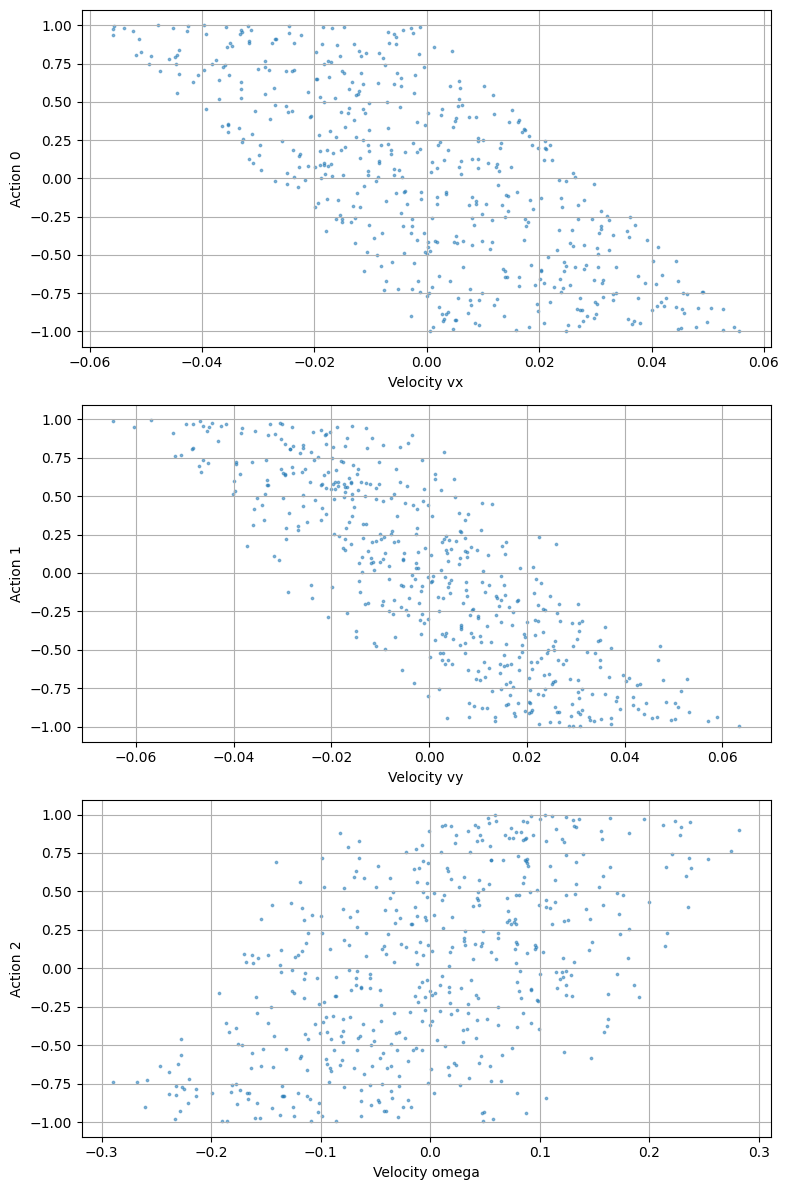

In [23]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„Åø ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢ÉÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(3,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])
        v = np.linalg.pinv(J) @ (action * r)
        vx, vy, omega = v

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}
        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ„Å®Â≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÁµêÊûú„Çí‰Ωø„Å£„Åü„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # ÁêÜÊÉ≥ËªåÈÅì
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1 / 0.0333))
video_path = "/content/omni_pybullet_arc.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶Áøí„Åó„Åü„É¢„Éá„É´„ÅÆ„ÄåË°åÂàó„ÄçÁöÑÊåôÂãï„ÅÆ„Ç∞„É©„ÉïÂåñ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

vel_samples = []
action_samples = []
for _ in range(500):
    action = np.random.uniform(-1, 1, size=3)
    v = np.linalg.pinv(J) @ (action * r)
    vel_samples.append(v)
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
labels = ['vx', 'vy', 'omega']
for i in range(3):
    axs[i].scatter(vel_samples[:, i], action_samples[:, i], s=3, alpha=0.5)
    axs[i].set_xlabel(f'Velocity {labels[i]}')
    axs[i].set_ylabel(f'Action {i}')
    axs[i].grid()
plt.tight_layout()
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.00128 |
| time/              |          |
|    fps             | 951      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -0.00138    |
| time/                   |             |
|    fps                  | 696         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004988052 |
|    clip_fraction        | 0.0276      |
|    clip_range           | 0.2         |
|    entropy_loss   

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_fixed_omega.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Â≠¶ÁøíÂæåÊé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02 -6.50521303e-19  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


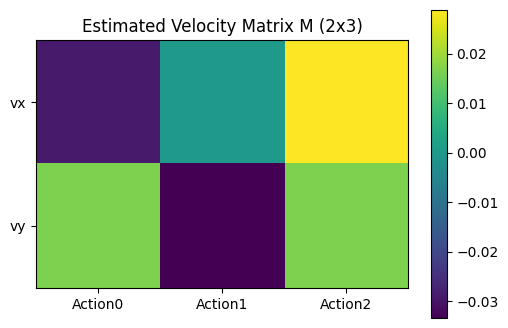

In [24]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„Åø ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢ÉÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 0.5  # ËßíÈÄüÂ∫¶„ÅØÂõ∫ÂÆö

        # 3Ëº™„ÅÆ„É¢„Éº„Çø„ÉºÂõûËª¢Êï∞„ÇíÂà∂Âæ°
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        # Áä∂ÊÖã„ÅØ‰ΩçÁΩÆ(x,y)„ÅÆ„Åø
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15
        # ÈÅãÂãïÂ≠¶Ë°åÂàó J (3x3) ‚Üí ‰ªäÂõû„ÅØËßíÈÄüÂ∫¶„ÅØÂõ∫ÂÆö„ÅßÁÑ°Ë¶ñ„Åó„ÄÅÈÄüÂ∫¶„ÅØ vx, vy „ÅÆ„Åø
        # 3Ëº™ÂõûËª¢Êï∞(action) ‚Üí vx, vy „ÇíÂ≠¶Áøí„Åô„ÇãÊÉ≥ÂÆö„Å™„ÅÆ„ÅßÊì¨‰ººÈÄÜË°åÂàó„ÅÆÂâçÂçäÈÉ®ÂàÜ2x3„ÇíÂà©Áî®
        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])

        # ËßíÈÄüÂ∫¶„ÅØÂõ∫ÂÆö
        omega = self.fixed_omega

        # action„ÅØ3Ëº™ÂõûËª¢Êï∞ [-1,1]
        # ËßíÈÄüÂ∫¶„ÅÆÂΩ±Èüø„ÇíÈô§„Åè„Åü„ÇÅ„ÄÅv = (vx, vy) „Çí J „ÅÆ1,2Ë°åÁõÆ„Å´Ê≥®ÁõÆ„Åó„Å¶Â≠¶Áøí„Åô„Çã„Ç§„É°„Éº„Ç∏
        # „Åì„Åì„Åß„ÅØÂçòÁ¥î„Å´Ë°åÂàóË®àÁÆó„Åß vx, vy „ÇíÊ±Ç„ÇÅ„ÇãÔºàÁúüÂÄ§„ÅØ J „ÅÆÊì¨‰ººÈÄÜË°åÂàó„Çà„ÇäË®àÁÆóÔºâ
        # ‰ªäÂõû„ÅØ v = M @ action „Åß M „ÅØ2x3Ë°åÂàó„ÅßÂ≠¶Áøí„Åó„Åü„ÅÑË°åÂàó
        # ÈÅãÂãïÂ≠¶ÁöÑ„Å´„ÅØ
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        # „É≠„Éú„ÉÉ„ÉàÂ∫ßÊ®ôÁ≥ª„Åã„Çâ‰∏ñÁïåÂ∫ßÊ®ôÁ≥ª„Å∏„ÅÆÈÄüÂ∫¶Â§âÊèõÔºàÂπ≥Èù¢ÁßªÂãïÔºâ
        dx = vx * np.cos(yaw) - vy * np.sin(yaw)
        dy = vx * np.sin(yaw) + vy * np.cos(yaw)

        new_pos = [pos[0] + dx * self.time_step,
                   pos[1] + dy * self.time_step,
                   pos[2]]
        new_orn = p.getQuaternionFromEuler([0, 0, yaw + omega * self.time_step])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)
        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØËªåÈÅì„Åã„Çâ„ÅÆË∑ùÈõ¢„ÅÆ„Éû„Ç§„Éä„Çπ‰∫å‰πóË™§Â∑ÆÔºàÂÜÜÂºß‰∏≠ÂøÉ„ÅØ(1,0), ÂçäÂæÑ1Ôºâ
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}
        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ„Å®Â≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Å®ÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # ÁêÜÊÉ≥ÂÜÜËªåÈÅì
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1 / 0.0333))
video_path = "/content/omni_pybullet_arc_fixed_omega.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆË°åÂàó M Êé®ÂÆö„Å®Ë°®Á§∫ ===
# Â≠¶Áøí„É¢„Éá„É´„ÅÆpolicy„Åã„ÇâÁõ¥Êé•Ë°åÂàóÊäΩÂá∫„ÅØÈõ£„Åó„ÅÑ„Åü„ÇÅ„ÄÅË°åÂàó M „Çí„É©„É≥„ÉÄ„É†„Çµ„É≥„Éó„É´„ÅßËøë‰ººÊé®ÂÆö

r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1, 1, size=3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)  # shape(500,2)
action_samples = np.array(action_samples)  # shape(500,3)

# M „ÇíÊúÄÂ∞è‰∫å‰πóÊ≥ï„ÅßÊ±Ç„ÇÅ„Çã (2x3 Ë°åÂàó)
# vel_samples = action_samples @ M.T „Å™„ÅÆ„Åß„ÄÅ
# M = (A^T A)^-1 A^T V „ÅßÊ±Ç„ÇÅ„Çã
A = action_samples  # (500,3)
V = vel_samples     # (500,2)

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)  # (3,2)
M = M.T  # Ëª¢ÁΩÆ„Åó„Å¶2x3Ë°åÂàó„Å´

print("Â≠¶ÁøíÂæåÊé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

# Ë°åÂàóM„Çí„Éí„Éº„Éà„Éû„ÉÉ„Éó„ÅßË°®Á§∫
plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0","Action1","Action2"])
plt.yticks(ticks=[0,1], labels=["vx","vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 300       |
|    ep_rew_mean     | -0.000636 |
| time/              |           |
|    fps             | 955       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -0.000667   |
| time/                   |             |
|    fps                  | 667         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004712268 |
|    clip_fraction        | 0.0218      |
|    clip_range           | 0.2         |
|    entro

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_fixed_omega.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Â≠¶ÁøíÂæå„Å´Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02  2.08166817e-17  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


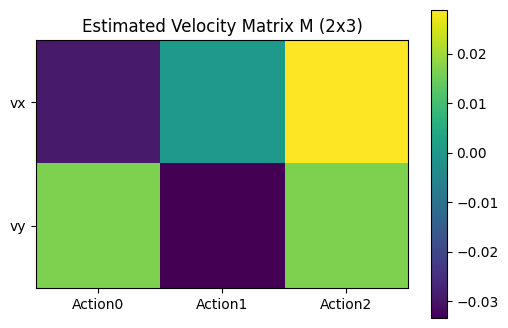

In [25]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„Åø ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢ÉÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 0.5  # ËßíÈÄüÂ∫¶„ÅØÂõ∫ÂÆöÔºàrad/sÔºâ

        # 3Ëº™„ÅÆ„É¢„Éº„Çø„ÉºÂõûËª¢Êï∞„ÇíÂà∂Âæ°
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        # Áä∂ÊÖã„ÅØ‰ΩçÁΩÆ(x,y)„ÅÆ„Åø
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5, 0.5, 0.5, 1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # Âõ∫ÂÆöËßíÈÄüÂ∫¶

        # 3Ëº™„ÅÆÂõûËª¢Êï∞action„Åã„Çâ„É≠„Éú„ÉÉ„ÉàÈÄüÂ∫¶Ë®àÁÆóÔºàvx, vyÔºâ
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        # „É≠„Éú„ÉÉ„ÉàÂ∫ßÊ®ôÁ≥ª„ÅÆÈÄüÂ∫¶„Çí‰∏ñÁïåÂ∫ßÊ®ôÁ≥ª„Å´Â§âÊèõ
        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # Áâ©ÁêÜ„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Å´ÈÄüÂ∫¶„Å®ËßíÈÄüÂ∫¶„Çí„Çª„ÉÉ„Éà
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØÂÜÜÂºß‰∏≠ÂøÉ(1,0)„Åã„Çâ„ÅÆË∑ùÈõ¢Ë™§Â∑Æ„ÅÆ‰∫å‰πó„Éû„Ç§„Éä„Çπ
        radius = np.sqrt((obs[0] - 1.0) ** 2 + (obs[1]) ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (300, 200), 100, (0, 255, 0), 1)  # ÁêÜÊÉ≥ÂÜÜËªåÈÅìË°®Á§∫
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1 / 0.0333))
video_path = "/content/omni_pybullet_arc_fixed_omega.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆÈÄüÂ∫¶Ë°åÂàó M Êé®ÂÆöÔºÜË°®Á§∫ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi / 3),  np.cos(np.pi / 3), l],
    [0, -1, l],
    [np.sin(np.pi / 3),  np.cos(np.pi / 3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1, 1, size=3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

# ÊúÄÂ∞è‰∫å‰πóÊ≥ï„Åß M „ÇíÊé®ÂÆö (2x3 Ë°åÂàó)
A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T  # Ëª¢ÁΩÆ„Åó„Å¶2Ë°å3Âàó

print("Â≠¶ÁøíÂæå„Å´Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0","Action1","Action2"])
plt.yticks(ticks=[0,1], labels=["vx","vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.69    |
| time/              |          |
|    fps             | 897      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -0.846       |
| time/                   |              |
|    fps                  | 666          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0062101604 |
|    clip_fraction        | 0.0289       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_fixed_omega1.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02  8.67361738e-19  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


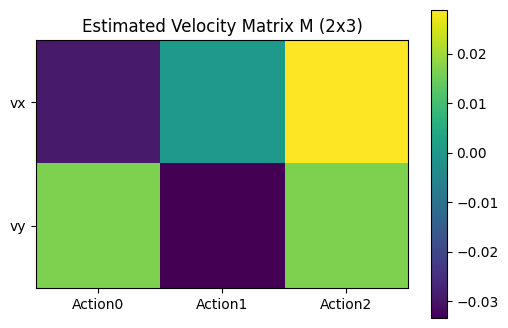

In [26]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 1.0  # ËßíÈÄüÂ∫¶1 rad/s„Å´Âõ∫ÂÆö

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0,0,0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # ËßíÈÄüÂ∫¶Âõ∫ÂÆö1.0 rad/s

        # action„ÅØ„É¢„Éº„Çø„ÉºÂõûËª¢Êï∞
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # ËßíÈÄüÂ∫¶„Å®Á∑öÂΩ¢ÈÄüÂ∫¶„ÇíÂº∑Âà∂„Çª„ÉÉ„Éà
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØÂÜÜÂºß‰∏≠ÂøÉ(1,0)„ÄÅÂçäÂæÑ1„Åã„Çâ„ÅÆË∑ùÈõ¢Ë™§Â∑Æ„ÅÆ„Éû„Ç§„Éä„Çπ‰∫å‰πó
        radius = np.sqrt((obs[0] - 1.0)**2 + (obs[1])**2)
        reward = float(- (radius - 1.0)**2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (300, 200), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_fixed_omega1.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆÈÄüÂ∫¶Ë°åÂàó M Êé®ÂÆöÔºÜË°®Á§∫ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -263     |
| time/              |          |
|    fps             | 831      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 300         |
|    ep_rew_mean          | -266        |
| time/                   |             |
|    fps                  | 646         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.001869684 |
|    clip_fraction        | 0.00264     |
|    clip_range           | 0.2         |
|    entropy_loss   

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_center0.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02 -1.73472348e-18  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


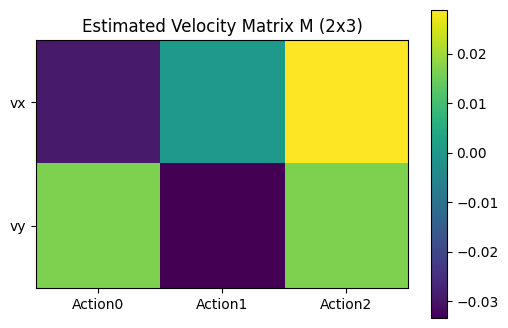

In [27]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 1.0  # ËßíÈÄüÂ∫¶1 rad/s„Å´Âõ∫ÂÆö

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0,0,0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # ËßíÈÄüÂ∫¶Âõ∫ÂÆö1.0 rad/s

        # action„ÅØ„É¢„Éº„Çø„ÉºÂõûËª¢Êï∞
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # ËßíÈÄüÂ∫¶„Å®Á∑öÂΩ¢ÈÄüÂ∫¶„ÇíÂº∑Âà∂„Çª„ÉÉ„Éà
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØÂÜÜÂºß‰∏≠ÂøÉ(0,0)„ÄÅÂçäÂæÑ1„Åã„Çâ„ÅÆË∑ùÈõ¢Ë™§Â∑Æ„ÅÆ„Éû„Ç§„Éä„Çπ‰∫å‰πó„Å´Â§âÊõ¥
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)  # ‰∏≠ÂøÉ(0,0)„ÅÆÁêÜÊÉ≥ÂÜÜËªåÈÅìË°®Á§∫
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_center0.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆÈÄüÂ∫¶Ë°åÂàó M Êé®ÂÆöÔºÜË°®Á§∫ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -219     |
| time/              |          |
|    fps             | 375      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -220         |
| time/                   |              |
|    fps                  | 448          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0026359705 |
|    clip_fraction        | 0.00767      |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_omega100.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02  1.38777878e-17  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


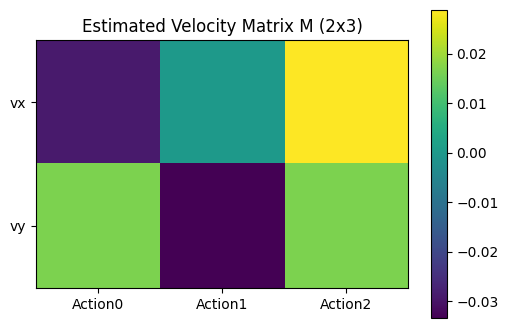

In [28]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 100.0  # ËßíÈÄüÂ∫¶„Çí100ÂÄç„Å´Ë®≠ÂÆö (100 rad/s)

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[0,0,0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # 100ÂÄç„ÅÆËßíÈÄüÂ∫¶

        # action„ÅØ„É¢„Éº„Çø„ÉºÂõûËª¢Êï∞
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # ËßíÈÄüÂ∫¶„Å®Á∑öÂΩ¢ÈÄüÂ∫¶„ÇíÂº∑Âà∂„Çª„ÉÉ„Éà
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØÂÜÜÂºß‰∏≠ÂøÉ(0,0)„ÄÅÂçäÂæÑ1„Åã„Çâ„ÅÆË∑ùÈõ¢Ë™§Â∑Æ„ÅÆ„Éû„Ç§„Éä„Çπ‰∫å‰πó
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_omega100.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆÈÄüÂ∫¶Ë°åÂàó M Êé®ÂÆöÔºÜË°®Á§∫ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.386   |
| time/              |          |
|    fps             | 475      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -0.82        |
| time/                   |              |
|    fps                  | 388          |
|    iterations           | 2            |
|    time_elapsed         | 10           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0034988283 |
|    clip_fraction        | 0.0182       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_arc_initial1_0.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02 -1.73472348e-18  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


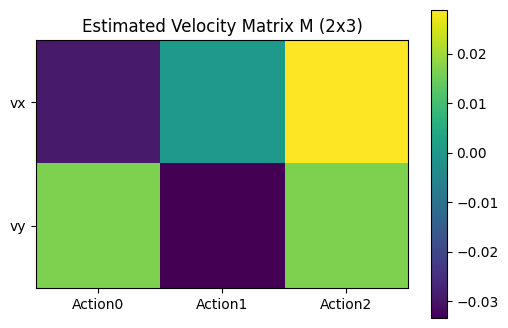

In [29]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_omega = 1.0  # ËßíÈÄüÂ∫¶1 rad/s„Å´Âõ∫ÂÆö

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        # ÂàùÊúü‰ΩçÁΩÆ„Çí (1, 0, 0.05) „Å´Â§âÊõ¥
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        omega = self.fixed_omega  # ËßíÈÄüÂ∫¶Âõ∫ÂÆö1.0 rad/s

        # action„ÅØ„É¢„Éº„Çø„ÉºÂõûËª¢Êï∞
        vel = np.linalg.pinv(J) @ (action * r)
        vx, vy = vel[0], vel[1]

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # ËßíÈÄüÂ∫¶„Å®Á∑öÂΩ¢ÈÄüÂ∫¶„ÇíÂº∑Âà∂„Çª„ÉÉ„Éà
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, omega])

        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØÂÜÜÂºß‰∏≠ÂøÉ(0,0)„ÄÅÂçäÂæÑ1„Åã„Çâ„ÅÆË∑ùÈõ¢Ë™§Â∑Æ„ÅÆ„Éû„Ç§„Éä„Çπ‰∫å‰πó
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_arc_initial1_0.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆÈÄüÂ∫¶Ë°åÂàó M Êé®ÂÆöÔºÜË°®Á§∫ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


In [30]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import time
import os
import imageio

class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super(OmniWheelEnv, self).__init__()
        self.render_mode = render_mode
        self.time_step = 1./60.
        self.max_steps = 500
        self.step_count = 0

        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)

        self.wheel_radius = 0.05
        self.robot_radius = 0.2
        self.l = self.robot_radius

        self.goal_omega = 10.0
        self.radius = 1.0
        self.goal_vx = -self.goal_omega * self.radius  # ‰∏≠ÂøÉ„ÅåÂéüÁÇπ„Å™„ÅÆ„ÅßxÊñπÂêë„Å´ÂõûËª¢
        self.goal_vy = 0.0
        self.goal_twist = np.array([self.goal_vx, self.goal_vy, self.goal_omega])

        self.frame_dir = "/tmp/frames"
        os.makedirs(self.frame_dir, exist_ok=True)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.reset()

    def reset(self, seed=None, options=None):
        p.resetSimulation()
        self.step_count = 0
        p.setGravity(0, 0, -9.8)
        p.setTimeStep(self.time_step)
        p.loadURDF("plane.urdf")

        # ÂàùÊúü‰ΩçÁΩÆ (1,0)
        self.robot_id = p.loadURDF("r2d2.urdf", [1.0, 0, 0.1])
        return self._get_obs(), {}

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        euler = p.getEulerFromQuaternion(orn)
        return np.array([pos[0], pos[1], euler[2]], dtype=np.float32)

    def step(self, action):
        self.step_count += 1

        A = (1/self.wheel_radius) * np.array([
            [-np.sin(np.pi/3),  np.cos(np.pi/3), self.l],
            [0,               -1,                self.l],
            [ np.sin(np.pi/3),  np.cos(np.pi/3), self.l],
        ])
        try:
            A_inv = np.linalg.pinv(A)
        except np.linalg.LinAlgError:
            A_inv = np.zeros((3, 3))

        twist = A_inv @ action

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        theta = p.getEulerFromQuaternion(orn)[2]

        dx = twist[0] * np.cos(theta) - twist[1] * np.sin(theta)
        dy = twist[0] * np.sin(theta) + twist[1] * np.cos(theta)

        new_pos = [pos[0] + dx * self.time_step, pos[1] + dy * self.time_step, pos[2]]
        new_theta = theta + twist[2] * self.time_step
        new_orn = p.getQuaternionFromEuler([0, 0, new_theta])
        p.resetBasePositionAndOrientation(self.robot_id, new_pos, new_orn)

        if self.render_mode:
            view = p.getCameraImage(320, 240)[2]
            imageio.imwrite(f"{self.frame_dir}/frame_{self.step_count:03d}.png", view)

        obs = self._get_obs()
        diff = twist - self.goal_twist
        reward = -float(np.sum(diff**2))

        done = self.step_count >= self.max_steps
        return obs, reward, done, False, {}

    def render(self):
        pass

    def close(self):
        p.disconnect()

# Áí∞Â¢É„Å®Â≠¶Áøí
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Ë©ï‰æ°„Å®Ë®òÈå≤
A_inv_list = []
env = OmniWheelEnv(render_mode=True)
obs, _ = env.reset()

for i in range(200):
    action, _ = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    A_inv_list.append(action)
    if done:
        break

env.close()

# ÂãïÁîªÂá∫Âäõ
images = []
for i in range(1, len(os.listdir(env.frame_dir)) + 1):
    filename = os.path.join(env.frame_dir, f"frame_{i:03d}.png")
    if os.path.exists(filename):
        images.append(imageio.imread(filename))

video_path = "/mnt/data/omni_simulation.mp4"
imageio.mimsave(video_path, images, fps=30)

# „Éó„É≠„ÉÉ„ÉàÂá∫Âäõ
A_inv_array = np.array(A_inv_list)
plt.figure(figsize=(10, 5))
plt.plot(A_inv_array)
plt.title("Motor Commands over Time")
plt.xlabel("Timestep")
plt.ylabel("Motor Command")
plt.legend(["Motor 1", "Motor 2", "Motor 3"])
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/data/motor_commands.png")
plt.show()

print("ÂãïÁîª„Éï„Ç°„Ç§„É´„ÅÆ„Éë„Çπ:", video_path)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 500      |
|    ep_rew_mean     | -1e+05   |
| time/              |          |
|    fps             | 818      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 500          |
|    ep_rew_mean          | -1e+05       |
| time/                   |              |
|    fps                  | 648          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0007059827 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    en

  images.append(imageio.imread(filename))



FileNotFoundError: The directory '/mnt/data' does not exist

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -18.3    |
| time/              |          |
|    fps             | 226      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -18.3        |
| time/                   |              |
|    fps                  | 155          |
|    iterations           | 2            |
|    time_elapsed         | 26           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0041581728 |
|    clip_fraction        | 0.0511       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_fixed_velocity.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):
[[-2.88675135e-02  6.93889390e-18  2.88675135e-02]
 [ 1.66666667e-02 -3.33333333e-02  1.66666667e-02]]


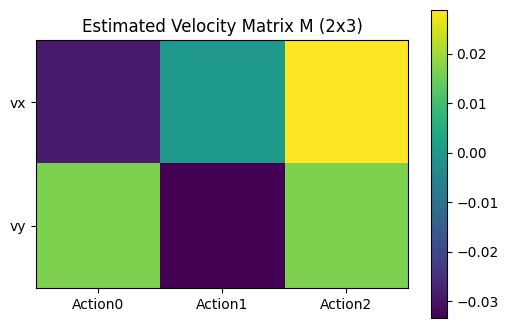

In [31]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_velocity = np.array([0.2, 0.0])  # vx, vy Âõ∫ÂÆö
        self.fixed_omega = 0.0  # ÂõûËª¢„Å™„Åó„Å´„Åô„ÇãÂ†¥Âêà

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])
        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        r = 0.05
        l = 0.15

        # ‰ªªÊÑè„ÅÆÂãï„ÅçÁî®„É§„Ç≥„ÉìË°åÂàó
        J = np.array([
            [-np.sin(np.pi / 3), np.cos(np.pi / 3), l],
            [0, -1, l],
            [np.sin(np.pi / 3), np.cos(np.pi / 3), l]
        ])

        # Âõ∫ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶„Çí‰ΩøÁî®
        vx, vy = self.fixed_velocity

        # ÁèæÂú®„ÅÆËßíÂ∫¶„Åã„Çâ„ÉØ„Éº„É´„ÉâÂ∫ßÊ®ô„Å∏Â§âÊèõ
        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        # „É≠„Éú„ÉÉ„Éà„ÅÆÈÄüÂ∫¶„ÇíÂº∑Âà∂ÁöÑ„Å´Ë®≠ÂÆö
        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, self.fixed_omega])

        p.stepSimulation()

        obs = self._get_obs()

        # Â†±ÈÖ¨„ÅØÂÜÜ‰∏≠ÂøÉ (0,0) „Åã„Çâ„ÅÆÂçäÂæÑ1„Å®„ÅÆË™§Â∑Æ
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥ÔºÜÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_fixed_velocity.mp4"
clip.write_videofile(video_path)
files.download(video_path)

# === 6. Â≠¶ÁøíÂæå„ÅÆÈÄüÂ∫¶Ë°åÂàó M Êé®ÂÆöÔºÜË°®Á§∫ ===
r = 0.05
l = 0.15
J = np.array([
    [-np.sin(np.pi/3), np.cos(np.pi/3), l],
    [0, -1, l],
    [np.sin(np.pi/3), np.cos(np.pi/3), l]
])

vel_samples = []
action_samples = []

for _ in range(500):
    action = np.random.uniform(-1,1,3)
    v = np.linalg.pinv(J) @ (action * r)
    vx, vy = v[0], v[1]
    vel_samples.append([vx, vy])
    action_samples.append(action)

vel_samples = np.array(vel_samples)
action_samples = np.array(action_samples)

A = action_samples
V = vel_samples

M, _, _, _ = np.linalg.lstsq(A, V, rcond=None)
M = M.T

print("Êé®ÂÆö„Åï„Çå„ÅüÈÄüÂ∫¶Ë°åÂàó M (2x3):")
print(M)

plt.figure(figsize=(6,4))
plt.title("Estimated Velocity Matrix M (2x3)")
plt.imshow(M, cmap='viridis')
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=["Action0", "Action1", "Action2"])
plt.yticks(ticks=[0,1], labels=["vx", "vy"])
plt.show()


In [32]:
# === 1. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Çπ„Éà„Éº„É´ ===
!pip install gymnasium stable-baselines3[extra] pybullet moviepy opencv-python matplotlib --quiet

# === 2. „É©„Ç§„Éñ„É©„É™„Ç§„É≥„Éù„Éº„Éà ===
import gymnasium as gym
import numpy as np
import pybullet as p
import pybullet_data
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from moviepy.editor import ImageSequenceClip
from google.colab import files
import matplotlib.pyplot as plt

# === 3. Áí∞Â¢É„ÇØ„É©„ÇπÂÆöÁæ© ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 300
        self.step_counter = 0
        self.fixed_speed = 0.3  # ÈÄü„Åï„Çí0.3 m/s„Å´Âõ∫ÂÆö

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        direction = np.array(action, dtype=np.float32)

        if np.linalg.norm(direction) > 1e-6:
            direction = direction / np.linalg.norm(direction)
        else:
            direction = np.array([1.0, 0.0])  # „Éá„Éï„Ç©„É´„ÉàÊñπÂêë

        vx, vy = direction * self.fixed_speed

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, 0])

        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === 4. Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØÔºÜÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === 5. „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„Å®ÂãïÁîª‰ΩúÊàê ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_pybullet_fixedspeed.mp4"
clip.write_videofile(video_path)
files.download(video_path)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 300      |
|    ep_rew_mean     | -0.515   |
| time/              |          |
|    fps             | 215      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | -0.628       |
| time/                   |              |
|    fps                  | 154          |
|    iterations           | 2            |
|    time_elapsed         | 26           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0024595954 |
|    clip_fraction        | 0.00728      |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_fixedspeed.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# === ÁúÅÁï•: „Ç§„É≥„Çπ„Éà„Éº„É´„Éª„É©„Ç§„Éñ„É©„É™Ë™≠„ÅøËæº„Åø„ÅØÂâçÂõû„Å®Âêå„Åò ===

# === Áí∞Â¢ÉÂÆöÁæ©Ôºà‰øÆÊ≠£ÁÇπ„ÅÇ„ÇäÔºâ ===
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 1000  # ÊñΩË°å„ÇíÈï∑„Åè„Åó„ÅüÔºÅ
        self.step_counter = 0
        self.fixed_speed = 0.3

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        direction = np.array(action, dtype=np.float32)

        if np.linalg.norm(direction) > 1e-6:
            direction = direction / np.linalg.norm(direction)
        else:
            direction = np.array([1.0, 0.0])

        vx, vy = direction * self.fixed_speed

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, 0])

        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# === Áí∞Â¢É‰ΩúÊàê„ÉªÂ≠¶Áøí ===
env = OmniWheelEnv(render_mode=False)
check_env(env)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=30000)
env.close()

# === „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥„ÉªÂãïÁîª‰ΩúÊàêÔºàÈï∑„Åè„Å™„Å£„ÅüÔºâ ===
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(sim_env.max_steps):  # ‚Üê „Çπ„ÉÜ„ÉÉ„ÉóÊï∞„Çí1000„Å´ÂØæÂøú
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400,400,3), dtype=np.uint8)*255
    cx, cy = 200, 200
    x = int(cx + obs[0]*100)
    y = int(cy - obs[1]*100)
    img = cv2.circle(img, (x,y), 4, (0,0,255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0,255,0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))  # 30 fps
video_path = "/content/omni_pybullet_long.mp4"
clip.write_videofile(video_path)
files.download(video_path)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -19.8    |
| time/              |          |
|    fps             | 193      |
|    iterations      | 1        |
|    time_elapsed    | 10       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -20.7        |
| time/                   |              |
|    fps                  | 132          |
|    iterations           | 2            |
|    time_elapsed         | 30           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0057834215 |
|    clip_fraction        | 0.0322       |
|    clip_range           | 0.2          |
|    en

Moviepy - Done !
Moviepy - video ready /content/omni_pybullet_long.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# „Ç§„É≥„Çπ„Éà„Éº„É´ÔºàÂøÖË¶Å„Å™„ÇâÔºâ
!pip install stable-baselines3[extra] moviepy pybullet -q

# „É©„Ç§„Éñ„É©„É™
import gym
import numpy as np
import pybullet as p
import pybullet_data
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import cv2
from moviepy.editor import ImageSequenceClip
from google.colab import files

# Áí∞Â¢ÉÂÆöÁæ©
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.time_step = 1. / 30.
        self.max_steps = 1000
        self.step_counter = 0
        self.fixed_speed = 3.0  # ‚Üê ÈÄü„Åï10ÂÄç„Å´Â§âÊõ¥ÔºÅ

        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(2,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-10.0, high=10.0, shape=(2,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setTimeStep(self.time_step)
        p.setGravity(0, 0, -9.8)
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        self.plane_id = p.loadURDF("plane.urdf")
        self.robot_id = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.step_counter = 0
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane_id = p.loadURDF("plane.urdf")

        col_id = p.createCollisionShape(p.GEOM_CYLINDER, radius=0.2, height=0.05)
        vis_id = p.createVisualShape(p.GEOM_CYLINDER, radius=0.2, length=0.05, rgbaColor=[0.5,0.5,0.5,1])
        self.robot_id = p.createMultiBody(baseMass=1,
                                          baseCollisionShapeIndex=col_id,
                                          baseVisualShapeIndex=vis_id,
                                          basePosition=[1, 0, 0.05])

        obs = self._get_obs()
        info = {}
        return obs, info

    def _get_obs(self):
        pos, _ = p.getBasePositionAndOrientation(self.robot_id)
        return np.array([pos[0], pos[1]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1
        direction = np.array(action, dtype=np.float32)

        if np.linalg.norm(direction) > 1e-6:
            direction = direction / np.linalg.norm(direction)
        else:
            direction = np.array([1.0, 0.0])

        vx, vy = direction * self.fixed_speed

        pos, orn = p.getBasePositionAndOrientation(self.robot_id)
        yaw = p.getEulerFromQuaternion(orn)[2]

        vx_world = vx * np.cos(yaw) - vy * np.sin(yaw)
        vy_world = vx * np.sin(yaw) + vy * np.cos(yaw)

        p.resetBaseVelocity(self.robot_id,
                            linearVelocity=[vx_world, vy_world, 0],
                            angularVelocity=[0, 0, 0])

        p.stepSimulation()

        obs = self._get_obs()
        radius = np.sqrt(obs[0] ** 2 + obs[1] ** 2)
        reward = float(- (radius - 1.0) ** 2)

        done = self.step_counter >= self.max_steps
        truncated = False
        info = {}

        return obs, reward, done, truncated, info

    def close(self):
        p.disconnect()

# Áí∞Â¢É„ÉÅ„Çß„ÉÉ„ÇØ„ÉªÂ≠¶Áøí
env = OmniWheelEnv(render_mode=False)
check_env(env)
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=30000)
env.close()

# Ë°åÂàóÊé®ÂÆöÁî®„ÅÆË®òÈå≤„Éá„Éº„Çø„ÇíÂèéÈõÜ
data_X = []
data_Y = []

sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()

for _ in range(sim_env.max_steps):
    action, _ = model.predict(obs)
    norm = np.linalg.norm(action)
    if norm > 1e-6:
        direction = action / norm
    else:
        direction = np.array([1.0, 0.0])

    data_X.append(obs)
    data_Y.append(direction)
    obs, _, done, _, _ = sim_env.step(action)
sim_env.close()

# Ë°åÂàóA„ÇíÊúÄÂ∞è‰∫å‰πó„ÅßÊé®ÂÆö
X = np.array(data_X)
Y = np.array(data_Y)
A, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)

print("=== Â≠¶Áøí„Å´„Çà„Å£„Å¶Âæó„Çâ„Çå„ÅüÂà∂Âæ°Ë°åÂàó A ===")
print(A)

# ÂèØË¶ñÂåñ„ÉªÂãïÁîªÁîüÊàê
sim_env = OmniWheelEnv(render_mode=False)
obs, _ = sim_env.reset()
frames = []

for _ in range(sim_env.max_steps):
    action, _ = model.predict(obs)
    obs, _, done, _, _ = sim_env.step(action)

    img = np.ones((400, 400, 3), dtype=np.uint8) * 255
    cx, cy = 200, 200
    x = int(cx + obs[0] * 100)
    y = int(cy - obs[1] * 100)
    img = cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
    img = cv2.circle(img, (cx, cy), 100, (0, 255, 0), 1)
    frames.append(img)

sim_env.close()

clip = ImageSequenceClip(frames, fps=int(1/0.0333))
video_path = "/content/omni_matrix_video.mp4"
clip.write_videofile(video_path)
files.download(video_path)


AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/


Â≠¶Áøí„Åï„Çå„Åü„É¢„Éº„Çø„ÉºÂà∂Âæ°Ë°åÂàó:
[[0.30198076 0.3613611  0.2011661 ]
 [0.2939066  0.35169923 0.19578744]
 [0.36753514 0.4398058  0.24483548]]


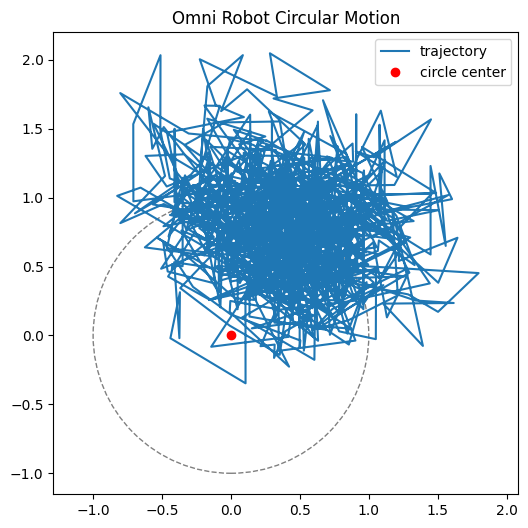

ÂãïÁîª„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: omni_simulation.mp4


In [36]:
# ÂøÖË¶Å„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np
import pybullet as p
import pybullet_data
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import matplotlib.pyplot as plt
import imageio
import os

# „Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥Áí∞Â¢É„ÅÆÂÆöÁæ©
class OmniWheelEnv(gym.Env):
    def __init__(self, render_mode=False):
        super().__init__()
        self.render_mode = render_mode
        self.max_steps = 1000
        self.time_step = 1. / 240.
        self.step_counter = 0
        self.radius = 1.0  # ÂÜÜÂºß„ÅÆÂçäÂæÑ
        self.speed = 10.0  # „É≠„Éú„ÉÉ„Éà„ÅÆÈÄü„ÅïÔºàËßíÈÄüÂ∫¶ √ó ÂçäÂæÑÔºâ
        self.omega = self.speed / self.radius  # ‰∏ÄÂÆö„ÅÆËßíÈÄüÂ∫¶

        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)
        self.action_space = spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)

        if self.render_mode:
            p.connect(p.GUI)
        else:
            p.connect(p.DIRECT)

        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        p.setGravity(0, 0, -9.8)
        self.plane = p.loadURDF("plane.urdf")
        self.robot = None

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        p.resetSimulation()
        p.setGravity(0, 0, -9.8)
        self.plane = p.loadURDF("plane.urdf")
        self.robot = p.loadURDF("r2d2.urdf", [1, 0, 0.1])  # ÂàùÊúü‰ΩçÁΩÆ(1,0)
        self.step_counter = 0
        return self._get_obs(), {}

    def _get_obs(self):
        pos, orn = p.getBasePositionAndOrientation(self.robot)
        lin_vel, ang_vel = p.getBaseVelocity(self.robot)
        return np.array([*pos[:2], orn[2], *lin_vel[:2], ang_vel[2]], dtype=np.float32)

    def step(self, action):
        self.step_counter += 1

        # „É¢„Éº„Çø„Éº„ÅÆÂá∫Âäõ„Çí„Ç∑„É≥„Éó„É´„Å´‰ΩçÁΩÆÂà∂Âæ°„Å®„Åó„Å¶ÂèçÊò†
        wheel_matrix = np.array([
            [-np.sqrt(3)/2, 0.5, 1],
            [0, -1, 1],
            [np.sqrt(3)/2, 0.5, 1]
        ])
        vel = wheel_matrix.T @ action * self.speed
        vx, vy, omega = vel[0], vel[1], vel[2]

        # „Éú„Éá„Ç£„Å´Âäõ„ÇíÂä†„Åà„ÇãÔºàÁ∞°Êòì„É¢„Éá„É´Ôºâ
        p.resetBaseVelocity(self.robot, linearVelocity=[vx, vy, 0], angularVelocity=[0, 0, omega])
        p.stepSimulation()

        obs = self._get_obs()
        x, y, _, _, _, _ = obs

        # ÂÜÜ„ÅÆ‰∏≠ÂøÉ„ÇíÂéüÁÇπ„Å´Ë®≠ÂÆö
        radius_error = np.sqrt(x**2 + y**2) - self.radius
        reward = -float(radius_error ** 2)
        terminated = False
        truncated = self.step_counter >= self.max_steps

        return obs, reward, terminated, truncated, {}

    def render(self):
        pass

    def close(self):
        p.disconnect()

# Áí∞Â¢É‰ΩúÊàê„Å®Ê§úË®º
env = OmniWheelEnv(render_mode=False)
check_env(env)

# Â≠¶Áøí
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=50000)

# Â≠¶Áøí„Åó„Åü„É¢„Éá„É´„Åß„Ç∑„Éü„É•„É¨„Éº„Ç∑„Éß„É≥
env = OmniWheelEnv(render_mode=False)
obs, _ = env.reset()
frames = []
traj = []

for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, _ = env.step(action)
    pos, _, = p.getBasePositionAndOrientation(env.robot)
    traj.append(pos[:2])

    # ÁîªÂÉèÂèñÂæó
    view_matrix = p.computeViewMatrixFromYawPitchRoll(cameraTargetPosition=[0, 0, 0.1], distance=3, yaw=90, pitch=-60, roll=0, upAxisIndex=2)
    proj_matrix = p.computeProjectionMatrixFOV(fov=60, aspect=1.0, nearVal=0.1, farVal=10.1)
    (_, _, px, _, _) = p.getCameraImage(320, 240, view_matrix, proj_matrix)
    img = np.reshape(px, (240, 320, 4))[:, :, :3]
    frames.append(img.astype(np.uint8))

    if terminated or truncated:
        break

# ÂãïÁîª‰øùÂ≠ò
video_path = "omni_simulation.mp4"
imageio.mimsave(video_path, frames, fps=30)

# Â≠¶ÁøíÁµêÊûú„ÅÆË°åÂàóË°®Á§∫
actions = []
states = []
for _ in range(300):
    action, _ = model.predict(obs)
    obs, _, terminated, truncated, _ = env.step(action)
    states.append(obs[:3])  # x, y, Œ∏
    actions.append(action)
    if terminated or truncated:
        break

actions = np.array(actions)
states = np.array(states)

pseudo_inverse = np.linalg.pinv(states)
matrix_estimate = pseudo_inverse @ actions
print("\nÂ≠¶Áøí„Åï„Çå„Åü„É¢„Éº„Çø„ÉºÂà∂Âæ°Ë°åÂàó:")
print(matrix_estimate)

# ÁµåË∑ØÊèèÁîª
traj = np.array(traj)
plt.figure(figsize=(6, 6))
plt.plot(traj[:, 0], traj[:, 1], label="trajectory")
plt.plot(0, 0, "ro", label="circle center")
circle = plt.Circle((0, 0), env.radius, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.axis("equal")
plt.legend()
plt.title("Omni Robot Circular Motion")
plt.show()

print("ÂãïÁîª„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü:", video_path)
